# Работа с изображениями

Человек получает более 80% информации с помощью зрения. В современном мире существует тенденция заменять человека в разных областях. Это создает стимул для развития копьютерного зрения, которое в последнее время все больше и больше набирает обороты. Действительно, существует множество задач, связанных с изображениями и видео, которые решаются средствами машинного обучения. Но прежде чем переходить к изучению навороченных алгоритмов глубоких сверточных сетей, генеративных сетей и т.д., необходимо сначала разобраться с базовыми понятиями цифровых изображений и научиться с ними работать.

## Что такое цифровое изображение?

В растовой графике ***цифровое изображение*** представляет собой матрицу размером ${H \times W \times C}$, где каждый элемент сопоставляется пикселю, ${H}$ - высота картинки в пикселях, ${W}$ - ширина, и ${C}$ - количество каналов изображения. 

Количество каналов зависит от ***цветового представления***. То есть от того, как компьютер интерпретирует цвет пикселя (какое ***цветовое пространство*** он использует). Чаще всего количество каналов равно 3, реже 4, а иногда и 1 (для картинок в градациях серого). Наиболее популярна RGB модель, где каждый пиксель состоит из трех чисел, соответствующих красному (R), зеленому (G) и синему (B) цветам.

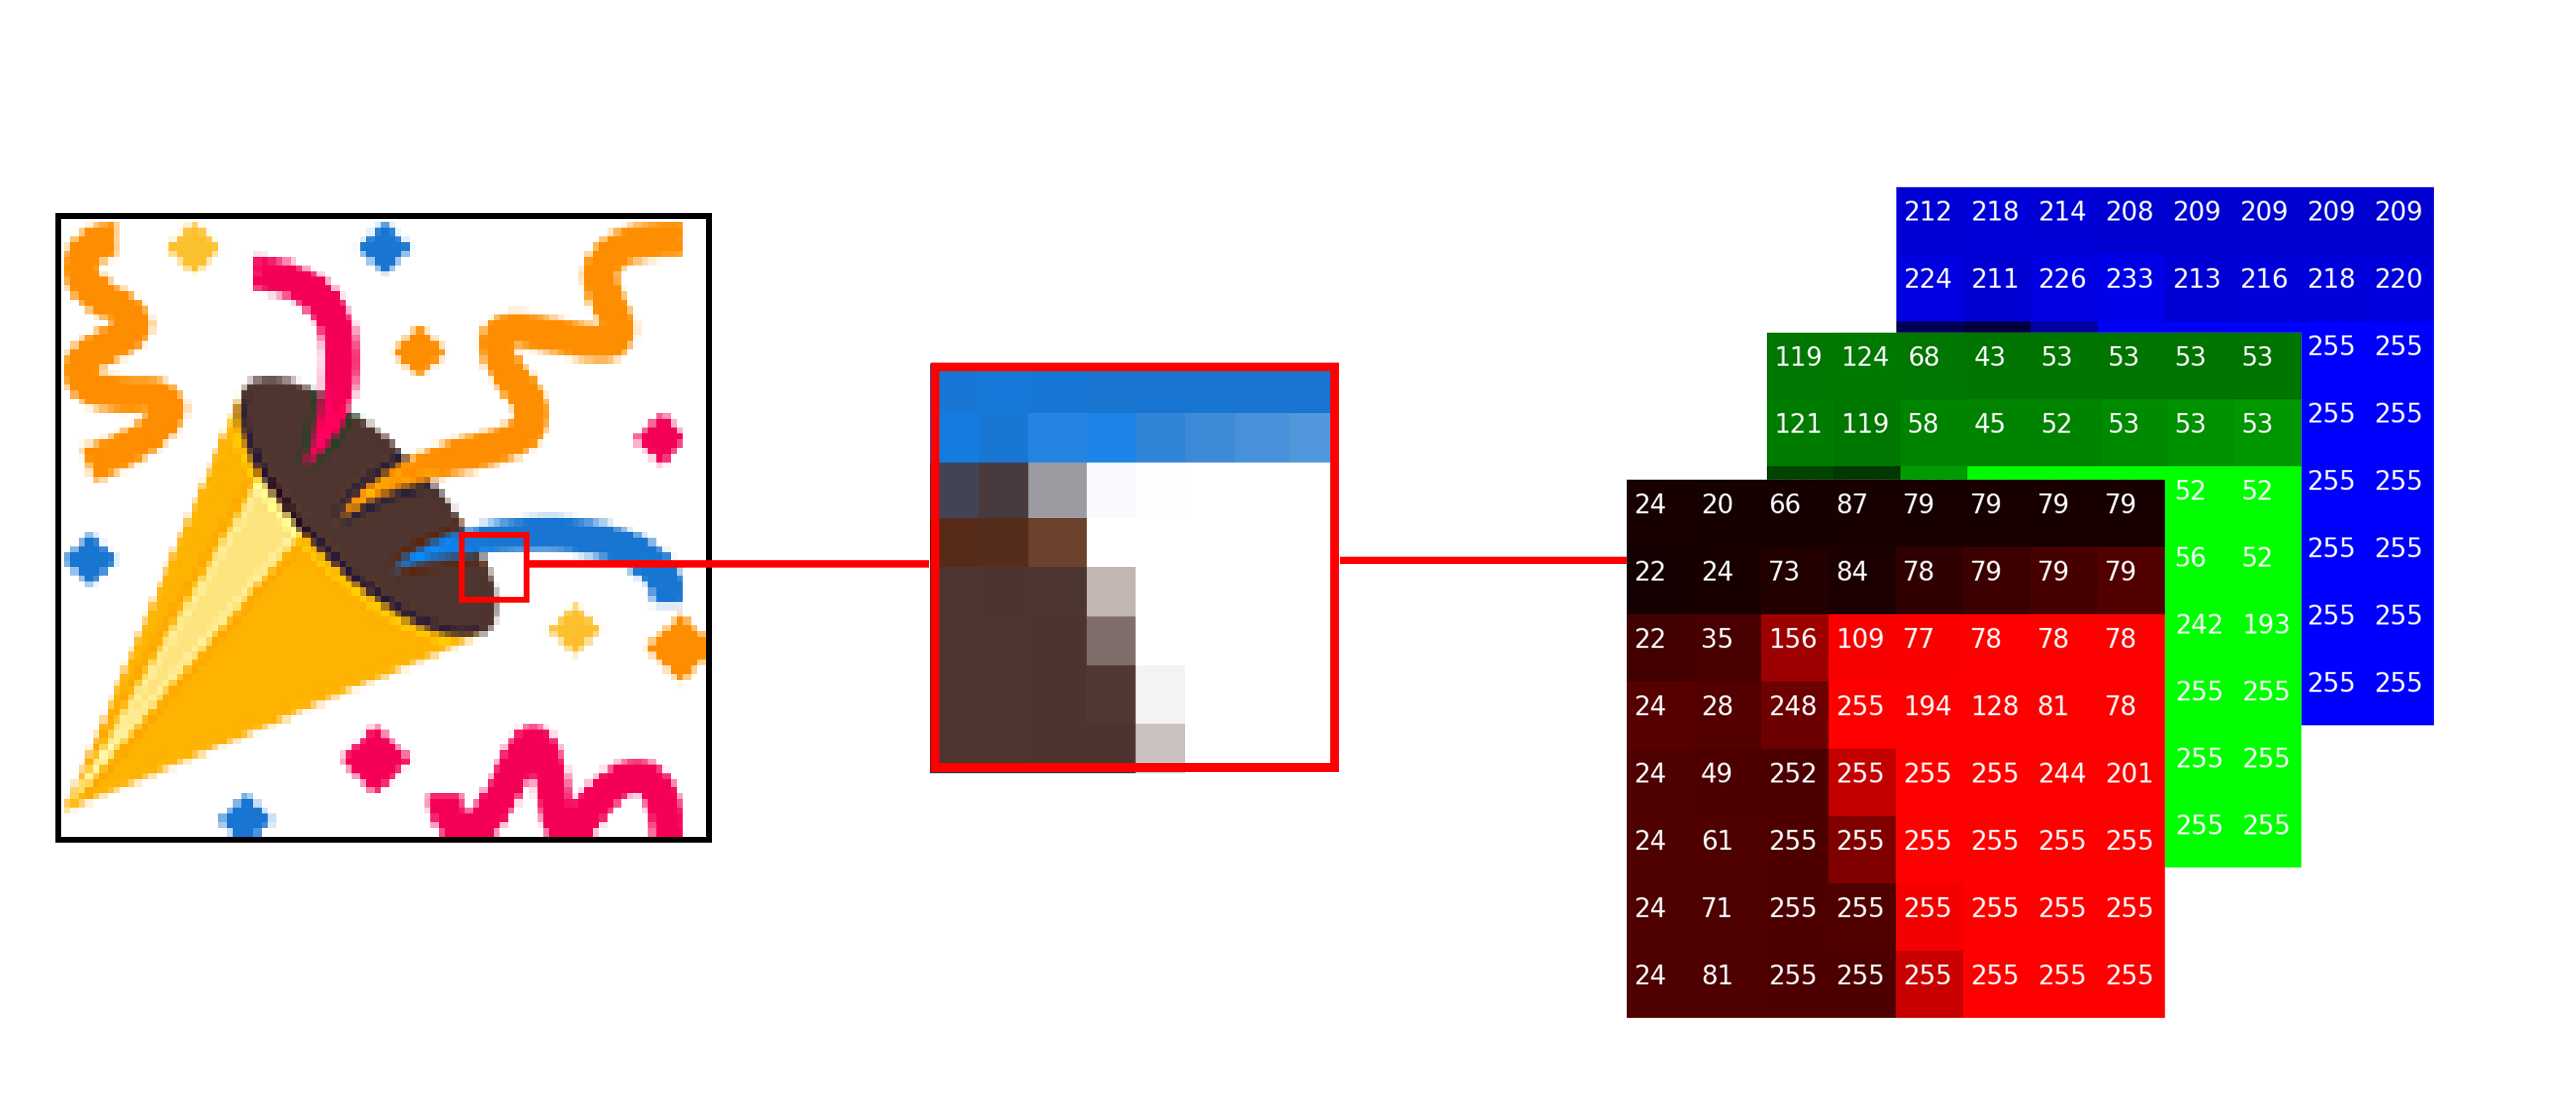

**Цветовое пространство** - это модель представления цвета в виде функции от числовых координат. То есть, это правило, по которому каждому набору чисел (цветовых координат) сопоставляется один цвет.

Например, вот так выглядит RGB модель в координатах:

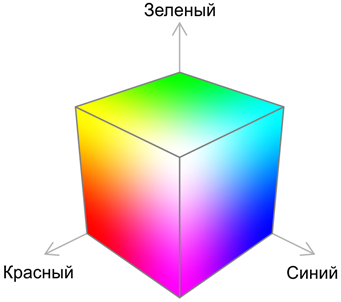


Другие *цветовые пространства*:

*   **BGR** - по сути то же самое, что и RGB, но каналы B и R поменяны местами
*   **HSV** - hue-saturation-value (тон-насыщенность-значение). Часто используется в программах компьютерной графики
* **RGBA** - то же самое, что и RGB, но добавляется альфа-канал (прозрачность)
*   **CMYK** - Cyan, Magenta, Yellow, Key (Black) - используется при печати
*   **YUV** - яркость (Y) и цветоразностные компоненты (U и V). Канал Y здесь соответствует черно-белой картинке, а U и V за оттенок цвета. Человеческий глаз очень чувствителен к изменению яркости, и значительно менее чувствителен к изменению цвета. Это позволяет хранить информацию о цвете в более сжатом виде.

Мы будем рассматривать только RGB и BGR модели.

Кроме того, для хранения изображения в памяти компьютера, используется понятие  **глубины цвета**. Это количество бит, используемых для хранения одной компоненты одного пикселя. От этого зависит, на сколько детально мы можем передать цвет: сколько разных оттенков мы сможем различать. Глубина может быть 4, 8, 16 и т.д. Соответственно количество различных цветов может быть ${{2^4}^3 = 16^3 = 4096}$ или ${{2^8}^3 = 256^3 ≈ 16.8 млн}$ и т.д. в зависимости от глубины.

Мы будем работать с 8-битными изображениями (uint8).

**Видео** можно рассматривать как последовательность изображений (кадров). Поэтому многие операции над видео не отличаются от операций над изображениями.

**Аугментация данных** (англ. data augmentation) — это методика создания дополнительных данных из имеющихся данных. Чаще всего, проблема ограниченного набора данных возникает при решении задач, связанных с обработкой изображений.
Для генерации дополнительных данных можно использовать следующие искажения:
* Геометрические (афинные, проективные, ...).
* Яркостные/цветовые.
* Замена фона.
* Искажения, характерные для решаемой задачи: блики, шумы, размытие и т. д.

Такой подход не требует большого количества человеческих ресурсов и сравнительно дешев, поскольку не требует разметки и сбора данных — весь процесс создания базы изображений определяется выбором алгоритма и параметров.

Главным минусом подобного метода является слабая связь качества работы системы на сгенерированных данных с качеством работы в реальных условиях. Кроме того, метод требует больших вычислительных мощностей для создания необходимого числа примеров. Выбор искажений, используемых при создания базы для конкретной задачи, также составляет определенную сложность.

Существует два типа аугментаций:

* Pre training augmentation * - модификация изображений до начала тренировки. Данный тип аугментаций важно проводить только после разбивки датасета на Train и * Validate Intraining augmentation * - аугментации, встроенные в фреймворк по умолчанию.

Почему же важно проводить до тренировочную аугментацию только после разделения датасета? Дело в том, что может произойти частичная утечка данных: аугментированные изображения могут попасть в Validate, с точки зрения обучения модели нейросети аугментированные фото являются дубликатами, что плохо сказывается на тренировочном процессе.

Аугментировать датасет можно и нужно, но главная мысль этого шага - не увлекаться аугментациями. При увеличении объема датасета в 7 раз сетка не станет в 7 раз эффективнее, но она может начать работать хуже. Стоит использовать только те аугментации, которые реально помогут, т.е. те, что отвечают реальным условиям. Если камера будет стоять внутри помещения, то аугментация “снег” или “туман” только навредит, ведь данных искажений в реальной жизни не будет.

## Примеры работы с изображениями

Теперь, когда мы разобрались с основными понятиями, давайте научимся простым операциям над изображениями. В этом нам поможет OpenCV, в этой библиотеке есть большой функционал для работы с картинками и видео. У нее, к тому же, есть хорошая документация https://docs.opencv.org/4.6.0/

Есть еще библиотеки PIL и sсikit-image, scipy.ndimage. Все они чем-то похожи, чем-то отличаются. Все зависит от ваших нужд. По правилам хорошего тона в одном коде лучше придерживаться одного фреймворка.

### Работа с файлами изображений

In [6]:
import cv2  # OpenCV
import matplotlib.pyplot as plt # Для визуализации
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# Загрузим любой файл с картинкой
from google.colab import files
uploaded = files.upload()

Saving img_example.jpg to img_example (1).jpg


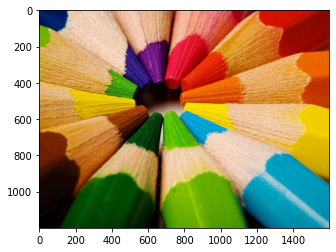

In [ ]:
# Загрузка изображения
img = cv2.imread('img_example.jpg')

# по умолчанию imread загружает картинку в BGR. matplotlib по умолчанию
# визуализирует картинку в RGB, поэтому давайте преобразуем формат
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Визуализируем
plt.imshow(img)
plt.show()
# обратите внимание на направление осей координат

In [ ]:
# У openCV тоже есть свои функции визуализации, но на мой взгляд matplotlib удобнее
# openCV открывает картинку в отдельном окне, это затрудняет работу
# Вот так выглядел бы код для OpenCV
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Если вы его запустите в colab, то увидите ошибку
# Поэтому будем пользоваться plt.imshow()

In [ ]:
# Теперь давайте посмотрим, что же из себя представляет объект img
print(type(img))
img.dtype

<class 'numpy.ndarray'>


dtype('uint8')

Получается, что это просто numpy array!

In [ ]:
# Мы можем вывести его shape
# Это и будет размер картинки в пикселях
img.shape

(1200, 1600, 3)

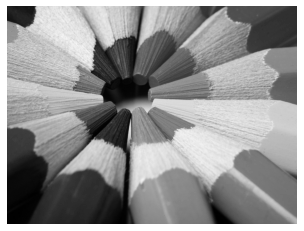

In [ ]:
# Что если мы хотим черно-белую картинку?
# мы можем сразу считать ее из файла в черно-белом варианте
gray = cv2.imread('img_example.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

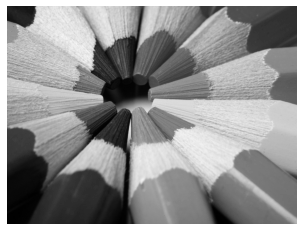

In [ ]:
# Либо мы можем исходную картинку преобразовать
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()
# Результат будет тот же

In [ ]:
# Как сохранять картинки
cv2.imwrite('output_img.jpg', gray)

True

### Базовые операции

#### Изменение размера изображения

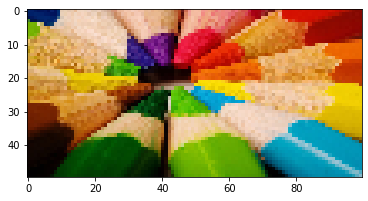

In [ ]:
# Изменить размер картинки, используя абсолютный размер
resized_img = cv2.resize(img, (100, 50))
plt.imshow(resized_img)
plt.show()

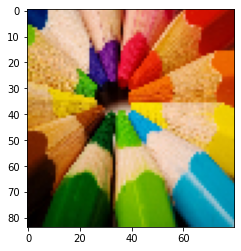

In [ ]:
# Изменить размер картинки, используя относительный размер
resized_img = cv2.resize(img, dsize=(0, 0), fx=0.05, fy=0.07)
plt.imshow(resized_img)
plt.show()

#### Кадрирование

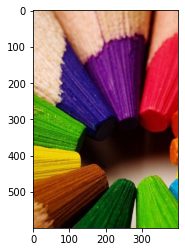

In [ ]:
# Если нам надо обрезать изображение, вспоминаем, что картинка - это numpy матрица
cropped_img = img[100:700, 400:800]
plt.imshow(cropped_img)
plt.show()

#### Аффинные преобразования

Если вы знакомы с линейной алгеброй, то вам должно быть знакомо понятие *аффинного преобразования*.

***Аффинное преобразование*** - это отображение плоскости или пространства в себя, при котором параллельные прямые переходят в параллельные прямые. Алгебраически это можно записать так:

${f: \mathbb{R}^n → \mathbb{R}^n}$

${f(x)=Mx + v,}$ ${ M -}$ обратимая  матрица, ${v \in \mathbb{R}^n}$

Говоря об изображениях, аффинное преобразование ${-}$ это комбинация масштабирования, перемещения, сдвига и поворота.

Стоит отметить, что деформация перспективы НЕ является аффинным преобразованием.

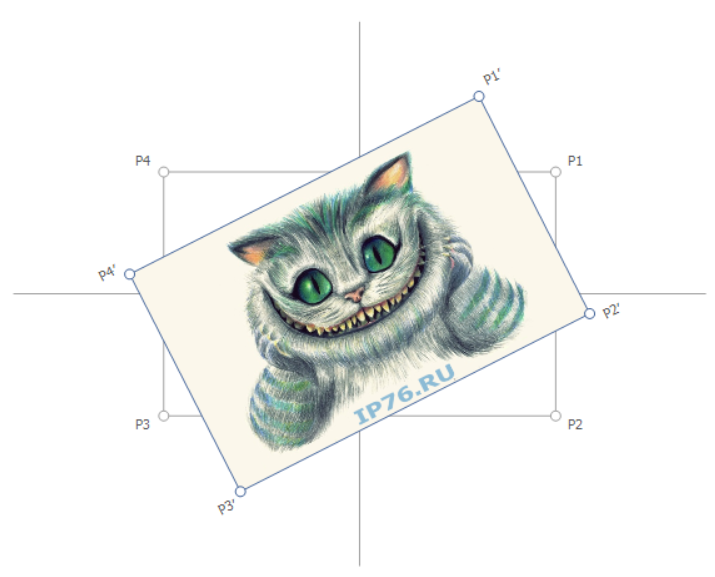

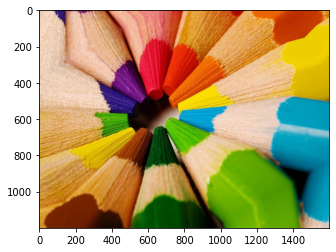

In [ ]:
# Поворот - частный случай аффинного преобразования
# сначала нужно создать матрицу преобразования
mat = cv2.getRotationMatrix2D(center=(img.shape[1] // 2, img.shape[0] // 2), angle=30, scale=1)
rotated_img = cv2.warpAffine(img, mat, dsize=img.shape[1::-1], borderMode=cv2.BORDER_REFLECT)
plt.imshow(rotated_img)
plt.show()

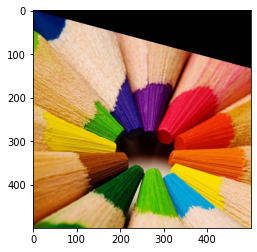

In [ ]:
# Еще пример
mat = cv2.getRotationMatrix2D(center=(0, 0), angle=-15, scale=0.5)
rotated_img = cv2.warpAffine(img, mat, dsize=(500, 500))
plt.imshow(rotated_img)
plt.show()

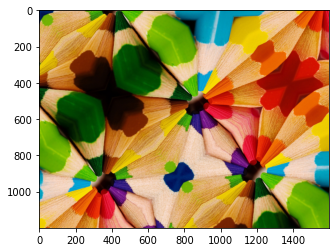

In [ ]:
# Еще пример (калейдоскоп :) )
center = (0, 0)
angle = 40
scale = 0.5
dsize = img.shape[1::-1]
borderMode = cv2.BORDER_REFLECT

mat = cv2.getRotationMatrix2D(center=center, angle=angle, scale=scale)
rotated_img = cv2.warpAffine(img, mat, dsize=dsize, borderMode=borderMode)
plt.imshow(rotated_img)
plt.show()

### Свертка

Свертка - очень популярная операция при работе с изображениями. Она позволяет конструировать большое количество преобразований с разными свойствами.

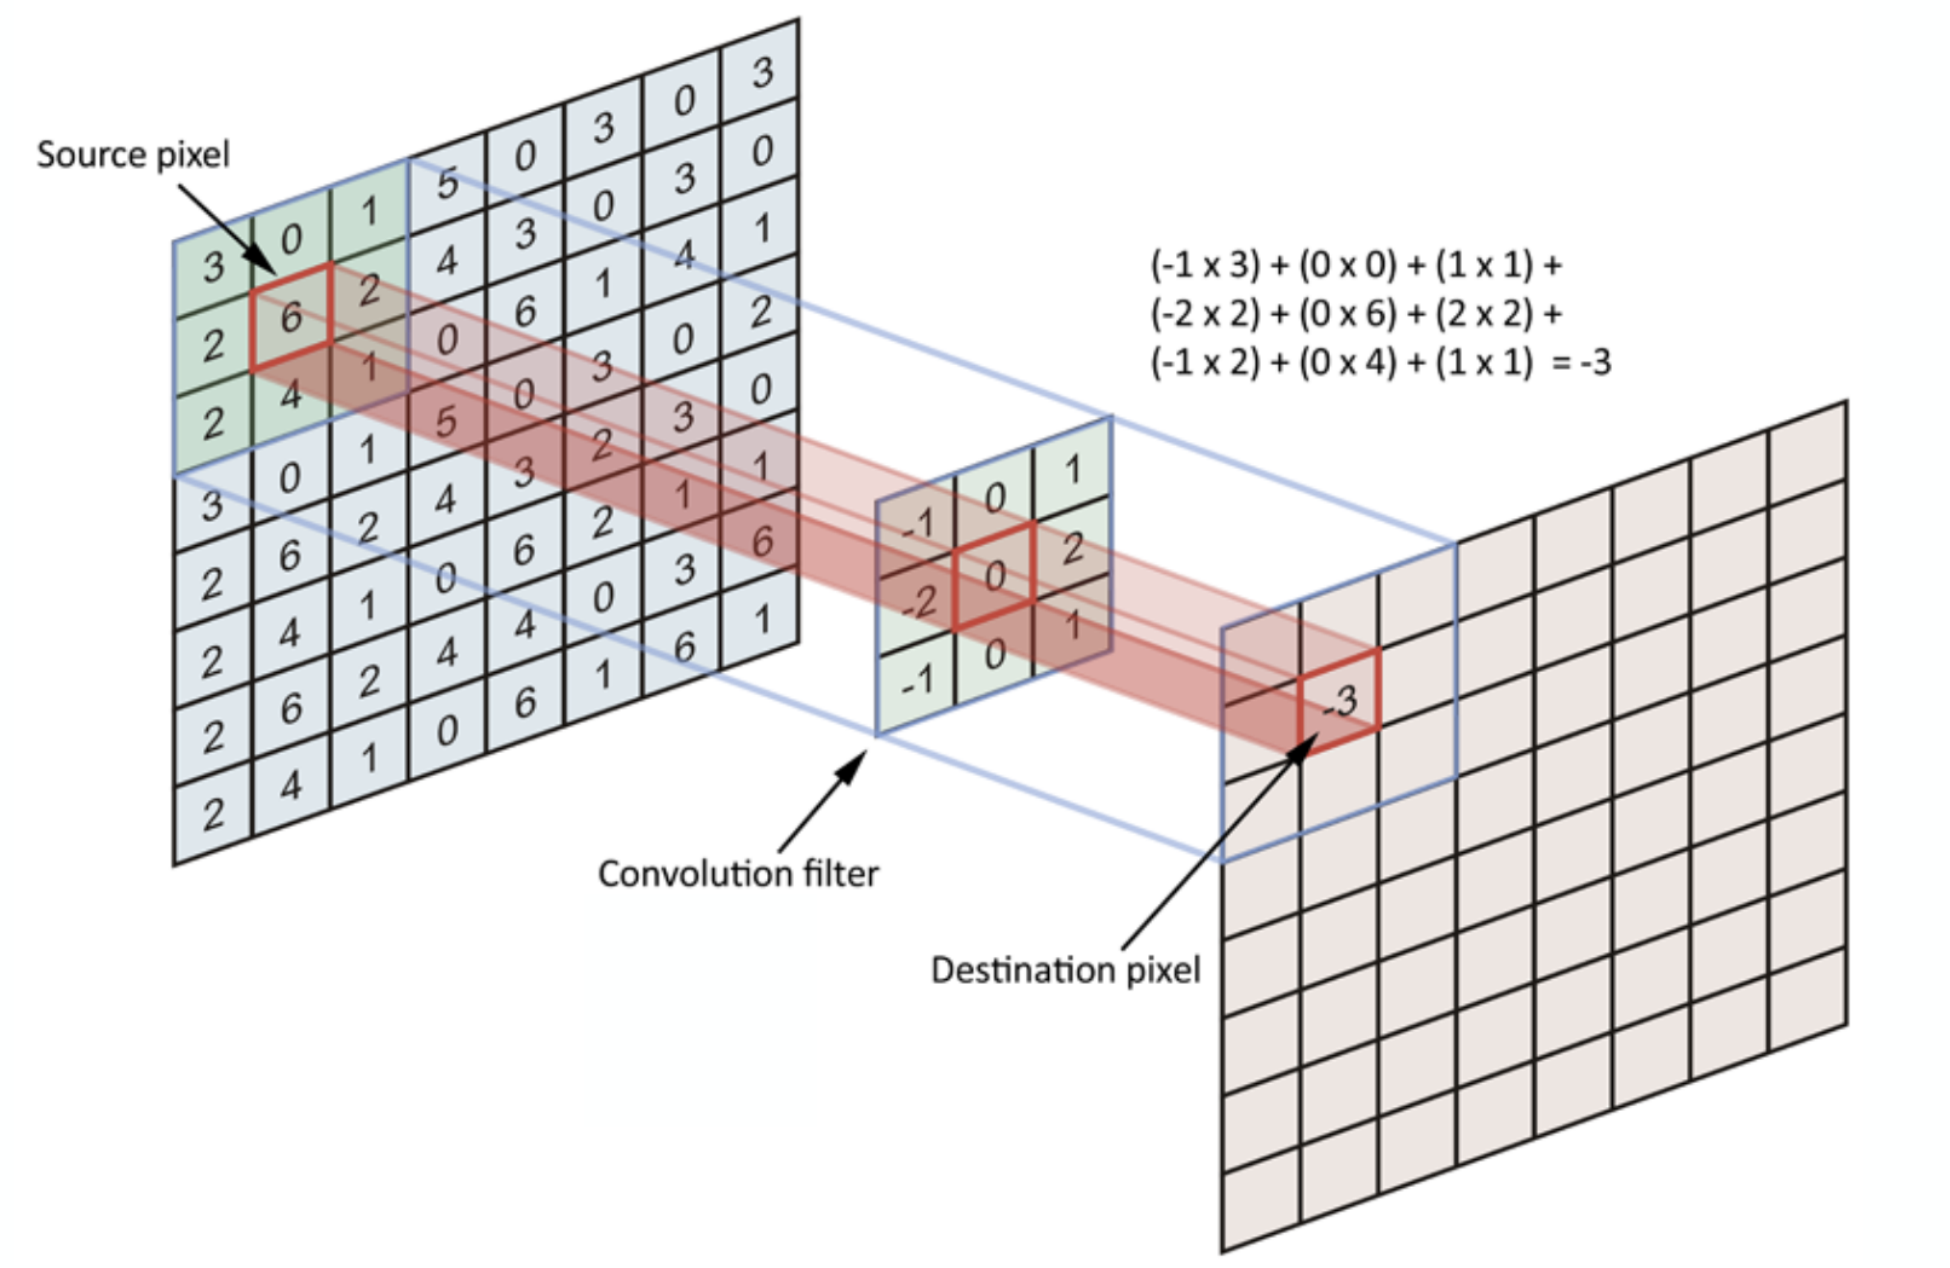

Формула свертки изображения $I$ с ядром $K$ размером ${h \times w}$:

${(I \circledast K)}_{xy} = \sum_{i=1}^h \sum_{j=1}^w K_{ij} \times I_{x+i-w//2,y+i-h//2}$ 

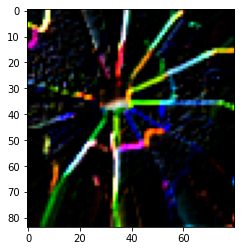

In [ ]:
# Cвертка
kernel = np.array([
                    [-1, -1,  0],
                    [-1,  0,  1],
                    [0,  1,  1]
                   ])
convolved_img = cv2.filter2D(resized_img, kernel=kernel, ddepth=-1)
plt.imshow(convolved_img)

Несколько полезных ядер свертки (с иллюстрациями) приведены в этой статье  https://en.wikipedia.org/wiki/Kernel_(image_processing)

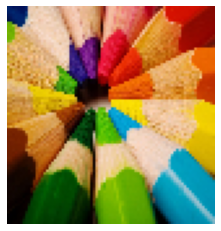

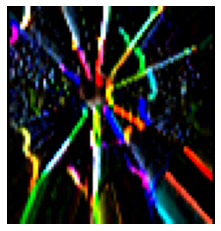

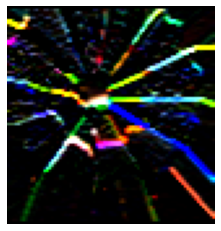

In [ ]:
# Фильтры Собеля - для подсчета градиентов по x или по y
# Свертка с фильтром Собеля выдает нам вертикальные или горизонтальные контуры
# Для размера ядра 3x3 фильтры выглядят так:
# Sx = [[-1,  0,  1],
#       [-2,  0,  2],
#       [-1,  0,  1]]
#
# Sy = [[-1,  -2 , -1],
#       [0,   0,    0],
#       [1,   2,    1]]

plt.imshow(resized_img)
plt.axis('off')
plt.show()

# Вертикальные контуры
gradx = cv2.Sobel(resized_img, ksize=3, dx=1, dy=0, ddepth=-1)
plt.imshow(gradx)
plt.axis('off')
plt.show()

# Горизонтальные контуры
grady = cv2.Sobel(resized_img, ksize=3, dx=0, dy=1, ddepth=-1)
plt.imshow(grady)
plt.axis('off')
plt.show()

### Различные преобразования изображений

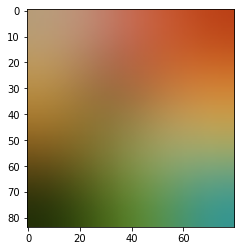

In [ ]:
# Свертка с ядром Гаусса: размытие изображения
blur = cv2.GaussianBlur(resized_img, (101, 101), 0)
plt.imshow(blur)
plt.show()

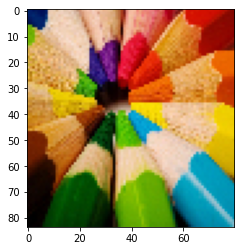

In [ ]:
# Добавление шума на картинку (аддитивный гауссовский шум)
def additive_gaussian_noise(img, mean=0, sigma=0.01):
    gauss = np.random.normal(mean,sigma,img.shape) * (255 // 2)
    noisy_img = img.astype(float) + gauss
    noisy_img = np.clip(np.round(noisy_img), 0, 255)
    return noisy_img.astype(np.uint8)

noisy_img = additive_gaussian_noise(resized_img)
plt.imshow(noisy_img, vmin=0, vmax=255)
plt.show()

## Характеристики изображения

Изображения, полученные с разных камер, с разными настройками, в разных условиях, могут отличаться по качеству. Существует несколько характеристик, отражающих качество изображения, которые при этом интуитивно понятны человеку при взгляде на изображение. Рассмотрим некоторые из них: *яркость, контраст, резкость, насыщенность*.

Яркость $-$ показатель того, насколько значения пикселей картинки близки к правой границе диапазона.

Контраст $-$ то, насколько темные места на каринке близки к черному, а светлые - к белому.

Резкость $-$ это то, насколько различимы границы объектов. То есть это контраст на краях (четкость краев).

Насыщенность $-$ это интенсивность цветов (в терминах чистых цветов). Оттенки серого являются наименее насыщенными, так как все базовые цвета вносят примерно одинаковый вклад.

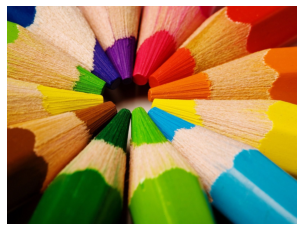

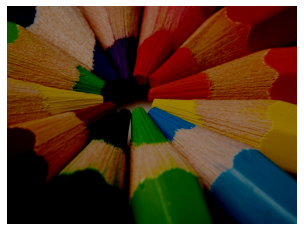

178.49367395833335 86.66148854166667


In [ ]:
# Яркость можно посчитать как среднее максимальное значение среди R, G, B
plt.imshow(img, vmin=0, vmax=255)
brightness = img.max(axis=2).mean()
plt.axis('off')
plt.show()

img1 = np.clip(img.astype(int) - 100, 0, 255).astype(np.uint8)  # Прибавим 100
plt.imshow(img1, vmin=0, vmax=255)
brightness1 = img1.max(axis=2).mean()
plt.axis('off')
plt.show()
print(brightness, brightness1)

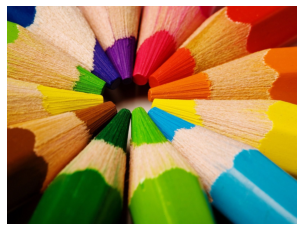

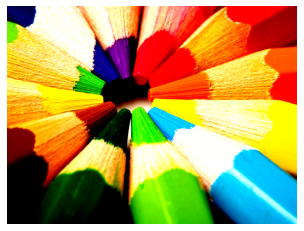

85.10604908229628 111.49913232681011


In [ ]:
# Контраст: один из вариантов вычисления контраста - это стандартное  отклонение интенсивности пикселей
plt.imshow(img, vmin=0, vmax=255)
contrast = img.std().mean()
plt.axis('off')
plt.show()

mean = img.mean()
img1 = (img.astype(float) - mean) * 2 + mean  # Increase contrast
img1 = np.clip(img1, 0, 255).astype(np.uint8)
plt.imshow(img1, vmin=0, vmax=255)
contrast1 = img1.std().mean()
plt.axis('off')
plt.show()
print(contrast, contrast1)

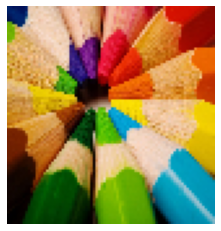

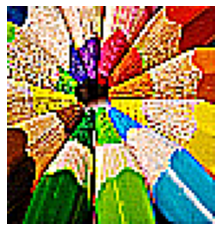

14.69714923588265 61.5315399330898


In [ ]:
# Резкость - тоже можно посчитать по разным формулам. 
# Одна из них - это средняя разница между сдвинутой по x (y) картинкой и исходной

def sharpness_shift_based(img):
    y_shifts = np.abs(img[: -1, :].astype(int) - img[1:, :].astype(int))
    x_shifts = np.abs(img[:, : -1].astype(int) - img[:, 1:].astype(int))
    return 0.5 * (x_shifts.mean() + y_shifts.mean())
  
plt.imshow(resized_img, vmin=0, vmax=255)
sharpness = sharpness_shift_based(resized_img)
plt.axis('off')
plt.show()

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img1 = cv2.filter2D(resized_img, -1, kernel)
plt.imshow(img1, vmin=0, vmax=255)
sharpness1 = sharpness_shift_based(img1)
plt.axis('off')
plt.show()
print(sharpness, sharpness1)

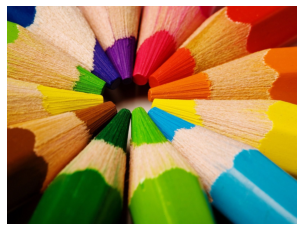

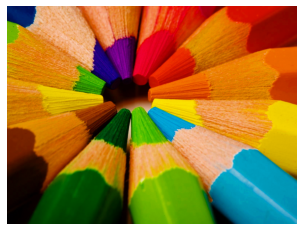

In [ ]:
# Насыщенность
plt.imshow(img, vmin=0, vmax=255)
contrast = img.std().mean()
plt.axis('off')
plt.show()

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:, :, 1] = np.clip(hsv[:, :, 1].astype(int) * 2, 0, 255).astype(np.uint8)
img1 = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(img1, vmin=0, vmax=255)
plt.axis('off')
plt.show()

## Доп материалы: Преобразование Фурье

Каждый канал изображения, по сути, является двумерным сигналом. Чтобы это представить, давайте визуализируем одну простую картинку на трехмерном графике. Для этого переведем ее сначала в grayscale, потом отложим координаты пикселей по осям x и y, а значения пикселей - по оси z.

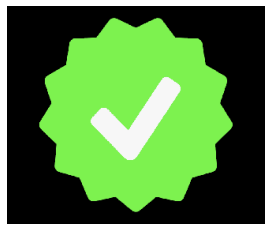

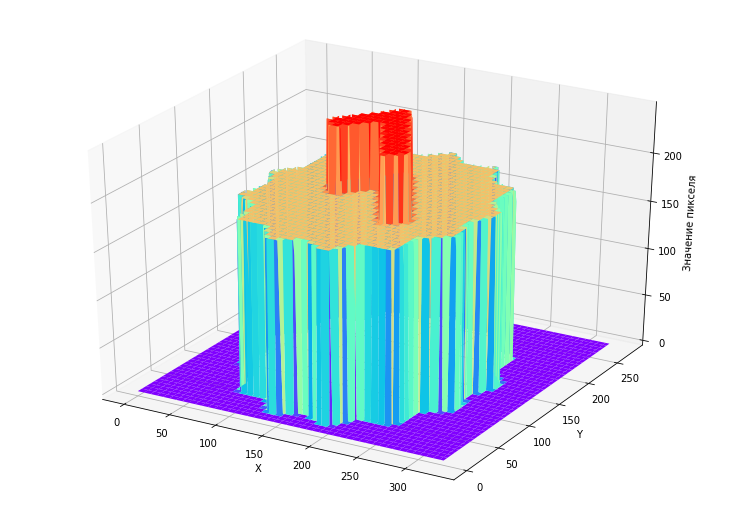

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
 
def img_plot3d(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = img_gray.shape
    c = np.meshgrid(np.arange(0, w), np.arange(0, h))
    fig = plt.figure(figsize=(10,7))
    ax1 = Axes3D(fig)
    ax1.plot_surface(c[0], c[1], img_gray, cmap='rainbow') # This color is better
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Значение пикселя')
    plt.show()
    return
 

img_signal2D = cv2.imread('signal2D.png')   
plt.imshow(img_signal2D)
plt.axis('off')
plt.show()
img_plot3d(img_signal2D)

Преобразование Фурье 

Изображение можно представить как сумму (ряд) волновых функций. 

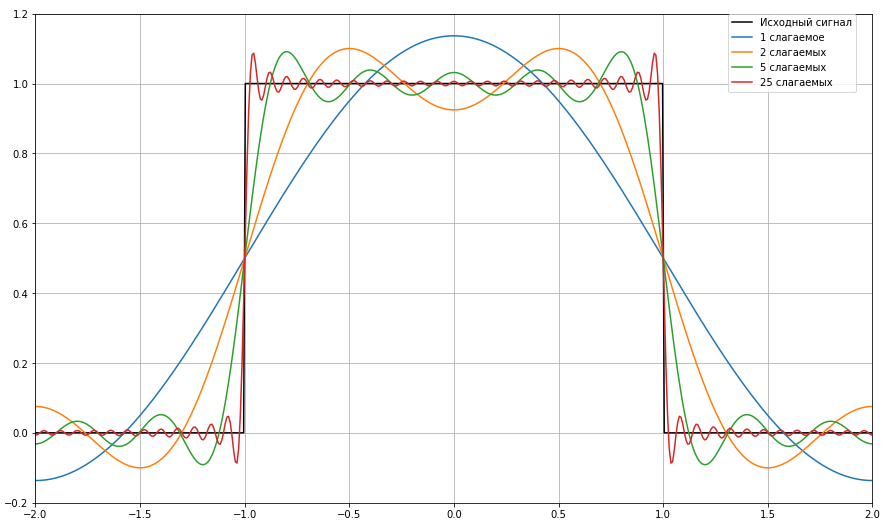

Таким образом мы можем представить картинку в частотном домене (вместо пространственного). То есть получаем спектр изображения. Низкие частоты соответствуют "грубым мазкам", а высокие - мелким деталям, границам и т.п.

Над этим представлением тоже можно проделывать различные полезные операции, например High Pass Filtering или Low Pass Filtering. А потом переводить обратно в пространственный домен.